In [3]:
import kaggle
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow.keras.utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tkinter import *
import PIL
from PIL import ImageDraw
import cv2 as cv

## Data Gathering 

EMNIST Data converted into csv format is now available on kaggle,for the first part of our model,we are using Balanced EMNIST DATA that has 47 classes as per documentataion and analyzing data using 'Pandas' librabry to find some useful insights.

In [4]:
# api=kaggle.api
# api.authenticate()
# api.dataset_download_files('furryroad/mnist-balanced-dataset',unzip=True)

In [3]:
X_train=pd.read_csv('train_X_data.csv')
y_train=pd.read_csv('train_Y_data.csv')
X_test=pd.read_csv('test_X_data.csv')
y_test=pd.read_csv('test_Y_data.csv')


In [7]:
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt' #class mapping for data

15.0    2400
22.0    2400
43.0    2400
19.0    2400
26.0    2400
34.0    2400
41.0    2400
6.0     2400
5.0     2400
12.0    2400
42.0    2400
29.0    2400
10.0    2400
40.0    2400
33.0    2400
18.0    2400
25.0    2400
0.0     2400
8.0     2400
2.0     2400
16.0    2400
32.0    2400
14.0    2400
35.0    2400
21.0    2400
30.0    2400
11.0    2400
28.0    2400
39.0    2400
38.0    2400
13.0    2400
17.0    2400
7.0     2400
24.0    2400
46.0    2400
31.0    2400
44.0    2400
20.0    2400
37.0    2400
27.0    2400
9.0     2400
3.0     2400
1.0     2400
36.0    2400
23.0    2400
4.0     2400
45.0    2399
Name: Unnamed: 0, dtype: int64

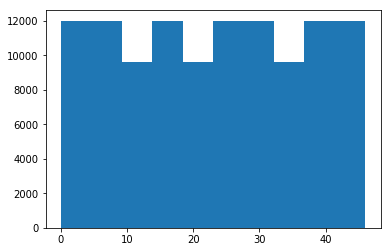

In [5]:
plt.hist(y_train['Unnamed: 0'])
y_train['Unnamed: 0'].value_counts()

As we can see, the available data nearly has uniform distributed.

And there are corrupted null values.

In [6]:
X_train.isnull().any().describe() # checking for corrupted values in data

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train=X_train.to_numpy()

In [8]:
X_train=np.moveaxis(X_train.reshape((-1,28,28,1)),1,2)
X_test=np.moveaxis(X_test.to_numpy().reshape((-1,28,28,1)),1,2)

In [9]:
y_train=tensorflow.keras.utils.to_categorical(y_train,num_classes=47)# one hot represtation of labels
X_train=X_train/255.0 #normalization 
y_test=tensorflow.keras.utils.to_categorical(y_test, num_classes=47)# one hot represtation of labels
X_test=X_test/255.0 #normalization 

'8'

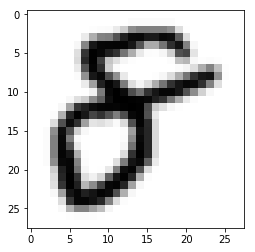

In [10]:
%matplotlib inline
i=111642
plt.imshow(X_train[i,:,:,0],cmap='gray_r')
class_mapping[np.argmax(y_train[i])]

Represtation of single example from training data,we will use similar format of data while testing it.

# Data Augmentation

In [12]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotates some images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zooms some image 
        width_shift_range=0.1,  # randomly shifts some images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shifts some images vertically (fraction of total height)
            )
datagen.fit(X_train)

# Sequential Model

In [36]:
model=Sequential() # initializing sequential model 
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128,kernel_size=(1,1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=47,activation='softmax'))

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
history=model.fit(X_train,y_train,epochs=30,verbose=1,validation_data=(X_test,y_test))

Train on 112799 samples, validate on 18799 samples
Epoch 1/30
112799/112799 [==============================] - 653s 6ms/sample - loss: 0.8445 - accuracy: 0.7375 - val_loss: 0.3932 - val_accuracy: 0.8621
Epoch 2/30
112799/112799 [==============================] - 125s 1ms/sample - loss: 0.4697 - accuracy: 0.8381 - val_loss: 0.3541 - val_accuracy: 0.8714
Epoch 3/30
112799/112799 [==============================] - 147s 1ms/sample - loss: 0.4132 - accuracy: 0.8544 - val_loss: 0.3423 - val_accuracy: 0.8748
Epoch 4/30
112799/112799 [==============================] - 123s 1ms/sample - loss: 0.3797 - accuracy: 0.8654 - val_loss: 0.3241 - val_accuracy: 0.8845
Epoch 5/30
112799/112799 [==============================] - 124s 1ms/sample - loss: 0.3594 - accuracy: 0.8710 - val_loss: 0.3126 - val_accuracy: 0.8888
Epoch 6/30
112799/112799 [==============================] - 124s 1ms/sample - loss: 0.3395 - accuracy: 0.8773 - val_loss: 0.3020 - val_accuracy: 0.8908
Epoch 7/30
112799/112799 [===========

In [49]:
model.evaluate(X_test,y_test)

18799/18799 [==============================] - 10s 541us/sample - loss: 0.2884 - accuracy: 0.9038


[0.28838540549683844, 0.90377146]

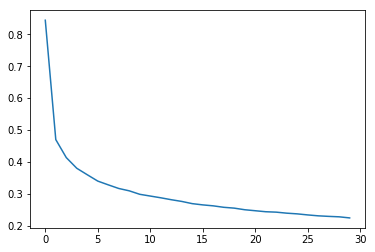

In [40]:
plt.plot(range(30),history.history['loss'])

In [41]:
model.save('model.h5')

('T', 'T')

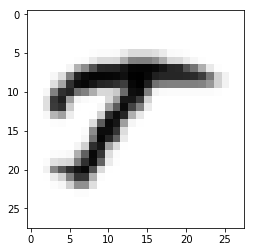

In [12]:
%matplotlib inline
i=89
plt.imshow(X_test[i,:,:,0],cmap='gray_r')
class_mapping[np.argmax(model.predict(X_test[i,:,:,:].reshape((-1,28,28,1))))],class_mapping[np.argmax(y_test[i])]

In [5]:
model=load_model('model.h5')

In [47]:

def load_image(file='test.png'):
    img = PIL.Image.open(file)
    img.thumbnail((28,28))
    img.save(file)
    im=cv.imread(file)
    im=cv.cvtColor(im,cv.COLOR_BGR2GRAY).flatten().reshape(1,784)
    im=255-im
    
    return im/255.0

canvas_width = 280
canvas_height = 280

def activate_paint(e):
    global lastx, lasty
    w.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y
def paint( e ):
    global lastx, lasty
    x, y = e.x, e.y
    w.create_line((lastx, lasty, x, y), width=3)
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='black', width=12)
    lastx, lasty = x, y
def digit_recog():
    save_image()
    im=load_image()
    cnn_op=model.predict(im.reshape((-1,28,28,1)))[0]

    op=class_mapping[np.argmax(cnn_op)]
    lab.configure(text=op)
def save_image():
    image1.save('test.png')
def reset():
    w.delete('all')
    lab.configure(text='')
    global image1,draw
    image1=PIL.Image.new("RGB",(280,280),'white')
    draw=ImageDraw.Draw(image1)
master = Tk()
master.title( "Painting using Ovals" )
w = Canvas(master, 
           width=canvas_width, 
           height=canvas_height,
           bg='white')
lastx,lasty=None,None
image1=PIL.Image.new("RGB",(280,280),'white')
draw=ImageDraw.Draw(image1)
w.pack(expand = YES, fill = BOTH)
w.bind( "<1>", activate_paint )
lab=Label(master,text='')
submit= Button(master,command=digit_recog,text='Submit')
reset= Button(master,command=reset,text='Reset')
submit.pack(side=BOTTOM)
reset.pack(side=BOTTOM)
message = Label( master, text = "Press and Drag the mouse to draw a number" )
message.pack( side = BOTTOM )
lab.pack(side= BOTTOM)

    
mainloop()

